# Onderzoeksobjectief 2: Het analyseren van de relatie tussen het aantal comments en views

Voorgaand onderzoek (Covington et al., 2016) wijst uit dat user engagement een belangrijke factor is bij het bepalen van de zichtbaarheid van video’s. Daarnaast stellen Krebs en Lischka (2019) en Soares et al. (2022) dat het aantal comments een directe invloed heeft op het bereik van video’s op YouTube. Dit onderzoek beoogt deze bevindingen verder te toetsen binnen de context van Nederlandstalige educatieve en wetenschappelijke content, waarbij verwacht wordt dat het aantal comments positief correleert met het aantal views.

**Onderzoeksvraag: Wat is de relatie tussen het aantal comments en het aantal views van een video?**


In [35]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Get the data from the previous step
videos = pd.read_excel('../output/videos.xlsx')

## Data Exploratie

In [3]:
# Sample data
videos.head()

,id,title,publish_date,duration,views,likes,dislikes,shares,comments,engagement,...,comments_2w,comments_1m,comments_2m,comments_3m,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m
0,yan_6zQUIxg,Kan je een vallende ster voorspellen?,2024-09-01T08:00:40Z,10:41,3099,116,1,51,28,6.26,...,25,25,25,25,10.23,7.90,7.25,6.79,6.53,6.43
1,Gg4EbXPQx5A,Hoe kan je zijn wie je echt bent? #dewarmsteweek,2021-12-20T15:00:15Z,15:33,18982,263,8,653,8,4.83,...,9,10,11,11,6.35,5.21,5.10,5.28,5.23,5.18
2,wlp4sxJv2ZA,Is kernfusie de energiebron van de toekomst?,2021-02-04T15:00:21Z,15:43,19394,155,17,242,15,2.04,...,11,11,11,12,3.65,2.00,2.18,2.19,2.42,2.48
3,yA9m1rrgw5Y,CORONA: Waarom is het zo moeilijk om te zeggen...,2020-04-09T16:00:34Z,1:25,3832,29,5,33,1,1.51,...,2,2,2,2,3.71,2.62,2.29,2.11,1.94,1.87
4,AM3xRmezvdw,Kan je proper zijn zonder zeep?,2023-12-17T06:30:03Z,8:45,28102,184,6,115,7,1.07,...,4,4,4,4,3.47,0.72,0.70,0.71,0.75,0.79


In [4]:
# Check number of rows and columns
videos.shape

(496, 46)

In [5]:
# Check data types for each column
videos.dtypes

id                      object
title                   object
publish_date            object
duration                object
views                    int64
likes                    int64
dislikes                 int64
shares                   int64
comments                 int64
engagement             float64
views_24h                int64
views_1w                 int64
views_2w                 int64
views_1m                 int64
views_2m                 int64
views_3m                 int64
likes_24h                int64
likes_1w                 int64
likes_2w                 int64
likes_1m                 int64
likes_2m                 int64
likes_3m                 int64
dislikes_24h             int64
dislikes_1w              int64
dislikes_2w              int64
dislikes_1m              int64
dislikes_2m              int64
dislikes_3m              int64
shares_24h               int64
shares_1w                int64
shares_2w                int64
shares_1m                int64
shares_2

In [6]:
# Check for missing values
videos.isnull().sum()

id                     0
title                  0
publish_date           0
duration               0
views                  0
likes                  0
dislikes               0
shares                 0
comments               0
engagement             0
views_24h              0
views_1w               0
views_2w               0
views_1m               0
views_2m               0
views_3m               0
likes_24h              0
likes_1w               0
likes_2w               0
likes_1m               0
likes_2m               0
likes_3m               0
dislikes_24h           0
dislikes_1w            0
dislikes_2w            0
dislikes_1m            0
dislikes_2m            0
dislikes_3m            0
shares_24h             0
shares_1w              0
shares_2w              0
shares_1m              0
shares_2m              0
shares_3m              0
comments_24h           0
comments_1w            0
comments_2w            0
comments_1m            0
comments_2m            0
comments_3m            0


## Beschrijvende statistieken

In [10]:
# Get a statistical summary for comments and views - end values
videos[['comments', 'views']].describe()

,comments,views
count,496.000000,496.000000
mean,16.431452,12059.752016
std,39.733091,28430.654691
min,0.000000,5.000000
25%,2.000000,2676.250000
50%,6.000000,5469.000000
75%,14.000000,11437.500000
max,464.000000,366620.000000


De dataset omvat 496 video’s. Het gemiddelde aantal comments bedraagt M = 16,43 (SD = 39,73), met een mediaan van Md = 6,00. De waarden variëren van een minimum van 0 tot een maximum van 464 comments. Het interkwartielbereik (IQR) loopt van 2,00 (25e percentiel) tot 14,00 (75e percentiel), wat wijst op een scheve verdeling met enkele hoge uitschieters.

Voor het aantal views bedraagt het gemiddelde M = 12.059,75 (SD = 28.430,65), met een mediaan van Md = 5.469,00. De minimumwaarde is 5 views, terwijl de maximumwaarde 366.620 views bedraagt. Het interkwartielbereik loopt van 2.676,25 tot 11.437,50 views. Ook hier is sprake van een sterke positieve scheefheid, zoals blijkt uit de hoge maximale waarde ten opzichte van de mediaan.

Deze resultaten suggereren aanzienlijke spreiding en enkele uitschieters in zowel het aantal comments als het aantal views, wat implicaties kan hebben voor de keuze van geschikte analysetechnieken in de volgende stappen.

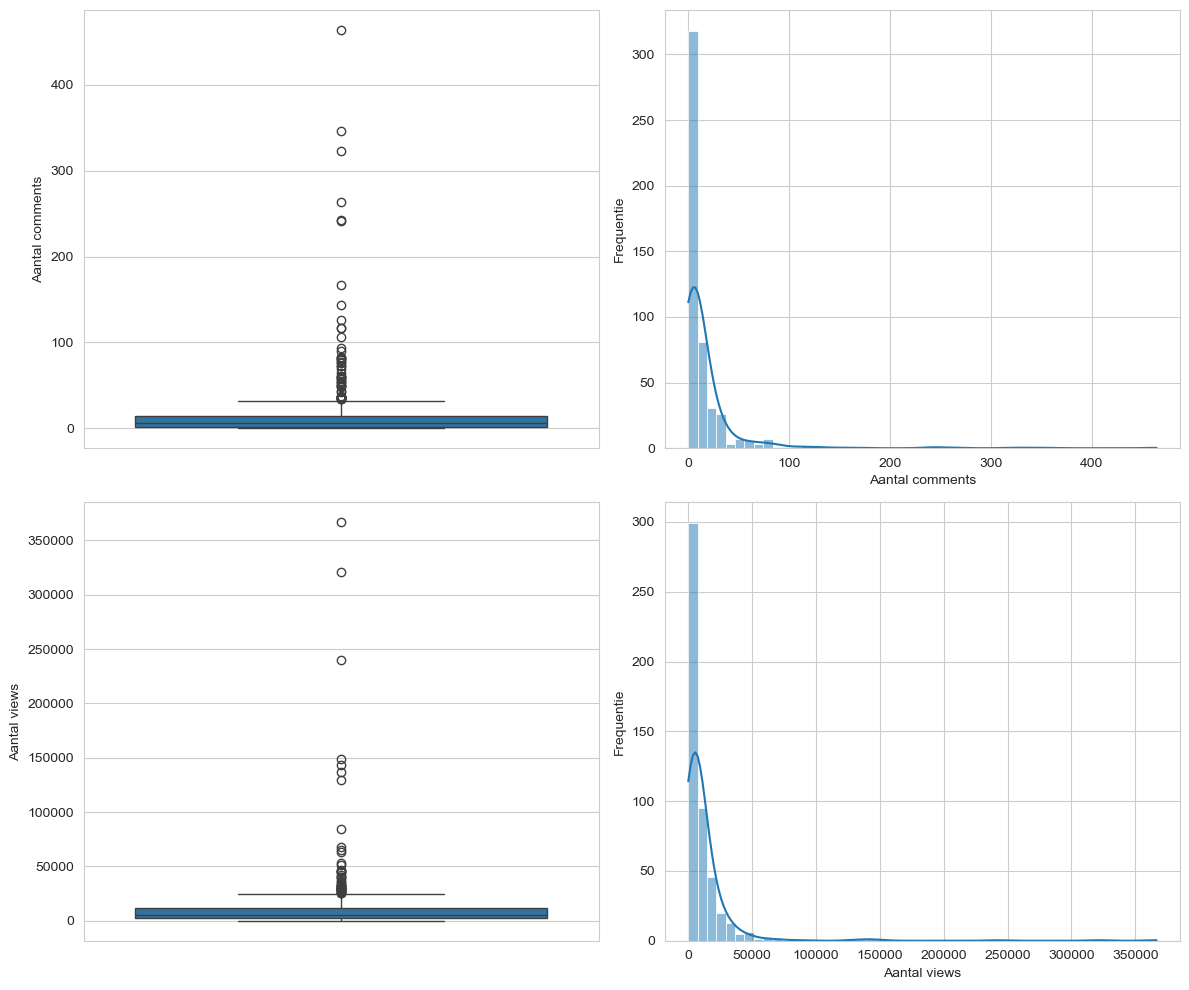

In [17]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot comments
sns.boxplot(y=videos['comments'], ax=axes[0, 0])
axes[0, 0].set_ylabel('Aantal comments')

# Histogram comments
sns.histplot(videos['comments'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Aantal comments')
axes[0, 1].set_ylabel('Frequentie')

# Boxplot views
sns.boxplot(y=videos['views'], ax=axes[1, 0])
axes[1, 0].set_ylabel('Aantal views')

# Histogram views
sns.histplot(videos['views'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Aantal views')
axes[1, 1].set_ylabel('Frequentie')

# Adjust layout
plt.tight_layout()
plt.show()

De boxplots en histogrammen tonen een sterk scheve verdeling voor zowel het aantal comments als het aantal views. In beide gevallen bevinden de meeste observaties zich dicht bij nul, met enkele extreme uitschieters. Zo zijn er bijvoorbeeld meerdere video’s met meer dan 100 comments en zelfs enkele met meer dan 300. Voor views zien we extreem hoge waarden boven de 100.000, oplopend tot meer dan 350.000.

De histogrammen bevestigen deze positieve scheefheid, met een sterke concentratie van waarden in de lagere regionen en een lange staart naar rechts. De boxplots tonen daarnaast dat deze uitschieters aanzienlijk afwijken van de rest van de data, wat zich uit in de vele punten boven de bovenste snor.

Deze verdeling heeft belangrijke methodologische implicaties:
1. **Statistische toetsen:** Parametrische tests zoals de Pearson-correlatie en lineaire regressie vereisen normaliteit en kunnen vertekend worden door deze scheefheid en uitschieters.
2. **Transformatie:** Het toepassen van een log-transformatie (`log1p`) is aangewezen om de verdelingen te normaliseren en de impact van uitschieters te reduceren.
3. **Robuuste alternatieven:** Naast Pearson moet ook Spearman’s rangcorrelatie worden berekend, aangezien die minder gevoelig is voor uitschieters.

Op basis van deze bevindingen wordt aanbevolen om in de volgende stap een log-transformatie van beide variabelen uit te voeren alvorens de correlaties en regressieanalyses te berekenen.

### Transformeren en Normaliseren

In [19]:
# Log transformation
videos['log_comments'] = np.log1p(videos['comments'])
videos['log_views'] = np.log1p(videos['views'])

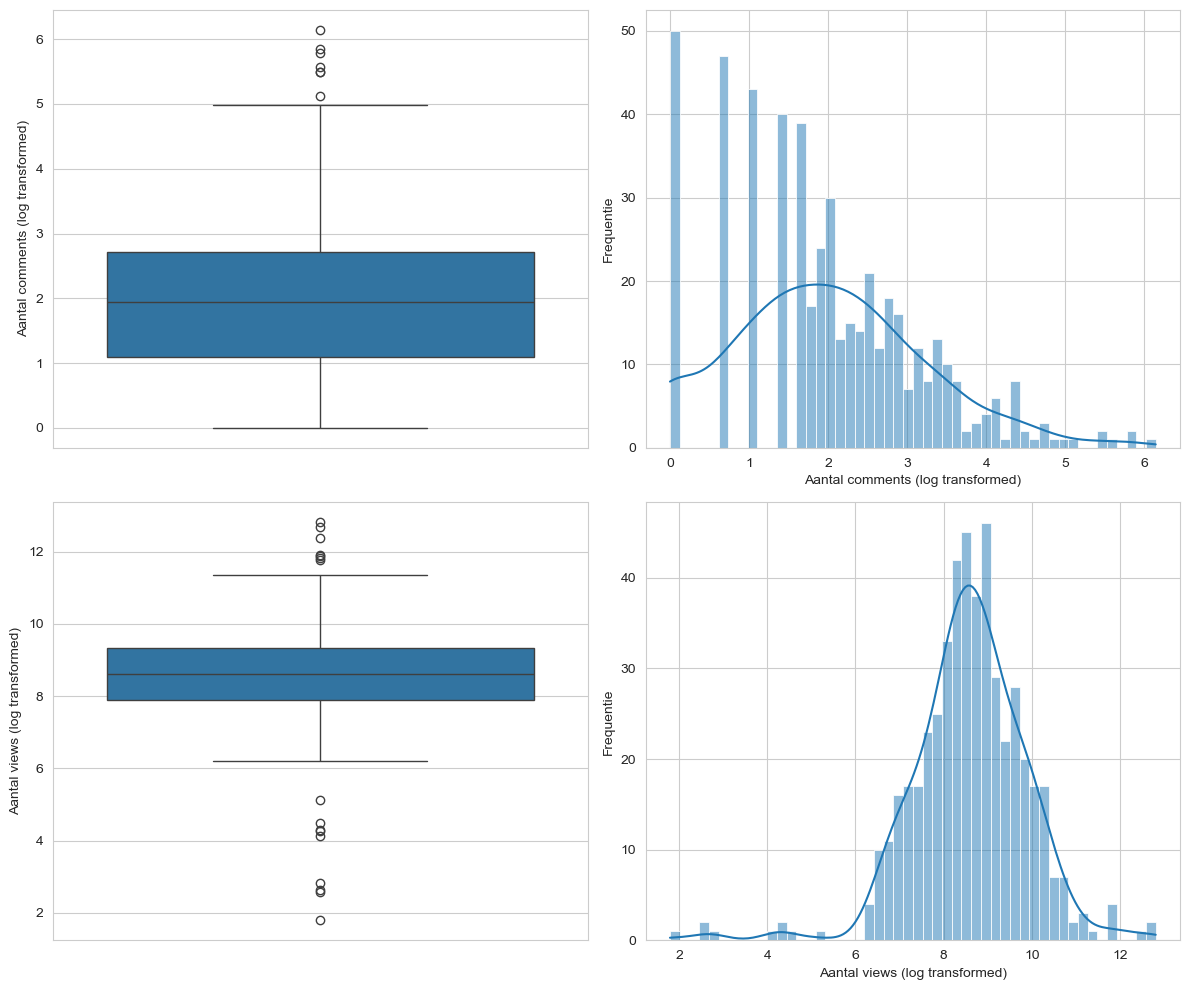

In [21]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot comments
sns.boxplot(y=videos['log_comments'], ax=axes[0, 0])
axes[0, 0].set_ylabel('Aantal comments (log transformed)')

# Histogram comments
sns.histplot(videos['log_comments'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Aantal comments (log transformed)')
axes[0, 1].set_ylabel('Frequentie')

# Boxplot views
sns.boxplot(y=videos['log_views'], ax=axes[1, 0])
axes[1, 0].set_ylabel('Aantal views (log transformed)')

# Histogram views
sns.histplot(videos['log_views'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Aantal views (log transformed)')
axes[1, 1].set_ylabel('Frequentie')

# Adjust layout
plt.tight_layout()
plt.show()

De log-transformatie heeft duidelijk effect gehad op de verdelingen van zowel het aantal comments als het aantal views.

Voor de comments zien we dat de verdeling aanzienlijk minder scheef is geworden, hoewel er nog steeds een lichte positieve scheefheid aanwezig is. De boxplot toont minder extreme uitschieters en een compacter interkwartielbereik. De histogram toont nu een verdeling die dichter bij symmetrisch ligt, maar nog niet volledig normaal.

Voor de views is de verbetering nog sterker. Na transformatie vertoont de histogram een bijna normale verdeling, met een duidelijke piek rond het midden en aflopende staarten. De boxplot bevestigt dit door de duidelijke reductie van extreme uitschieters en een gebalanceerde verdeling rond de mediaan.

Conclusie: De log-transformatie heeft de verdelingen voldoende genormaliseerd om verder te gaan met parametische analyses (zoals Pearson-correlatie en lineaire regressie). Toch blijft het aanbevolen om de normaliteit formeel te toetsen met de Shapiro-Wilk test en aanvullend een robuuste Spearman-correlatie te rapporteren.

In [22]:
# Shapiro-Wilk test
shapiro_comments = stats.shapiro(videos['log_comments'])
shapiro_views = stats.shapiro(videos['log_views'])

print(f"Log-comments Shapiro-Wilk: statistic={shapiro_comments.statistic:.4f}, p-value={shapiro_comments.pvalue:.4f}")
print(f"Log-views Shapiro-Wilk: statistic={shapiro_views.statistic:.4f}, p-value={shapiro_views.pvalue:.4f}")

# Interpretation
if shapiro_comments.pvalue < 0.05:
    print("Interpretatie log-comments: significant afwijking van normaliteit (p < 0,05).")
else:
    print("Interpretatie log-comments: geen significante afwijking van normaliteit (p ≥ 0,05).")

if shapiro_views.pvalue < 0.05:
    print("Interpretatie log-views: significant afwijking van normaliteit (p < 0,05).")
else:
    print("Interpretatie log-views: geen significante afwijking van normaliteit (p ≥ 0,05).")

Log-comments Shapiro-Wilk: statistic=0.9720, p-value=0.0000
Log-views Shapiro-Wilk: statistic=0.9464, p-value=0.0000
Interpretatie log-comments: significant afwijking van normaliteit (p < 0,05).
Interpretatie log-views: significant afwijking van normaliteit (p < 0,05).


De Shapiro-Wilk-toets toont aan dat zowel de log-getransformeerde comments (W = 0.972, p < .001) als de log-getransformeerde views (W = 0.946, p < .001) significant afwijken van een normale verdeling. Dit betekent dat de nulhypothese van normaliteit verworpen moet worden, ondanks de visuele verbetering na transformatie.

Methodologisch gezien betekent dit dat:
1. Het gebruik van parametrische toetsen zoals de Pearson-correlatie en lineaire regressie formeel niet ideaal is, tenzij je expliciet aangeeft dat je robustheidsanalyses of transformatie hebt toegepast.
2. Het aanbevolen is om de Spearman’s rangcorrelatie (rho) te berekenen, aangezien deze niet gevoelig is voor de schending van normaliteitsassumpties.
3. Bij regressieanalyses is het raadzaam de residualen te onderzoeken op normaliteit en homoscedasticiteit, en eventueel robustere modellen te overwegen.

Kortom: de log-transformatie helpt, maar heft de schending van de normaliteitsassumptie niet volledig op.

## Statistische analyse

### Correlatie (Pearson & Spearman)

In [23]:
# Pearson-correlation (log transformed data)
pearson_corr, pearson_p = stats.pearsonr(videos['log_comments'], videos['log_views'])

print(f"Pearson-correlatie: r = {pearson_corr:.4f}, p = {pearson_p:.4f}")

# Interpretation
if pearson_p < 0.05:
    interpretation = f"Er werd een significante positieve correlatie gevonden tussen het log-aantal comments en het log-aantal views, r = {pearson_corr:.2f}, p < .05."
else:
    interpretation = f"Er werd geen significante correlatie gevonden tussen het log-aantal comments en het log-aantal views, r = {pearson_corr:.2f}, p ≥ .05."

print("Interpretatie:", interpretation)

Pearson-correlatie: r = 0.7517, p = 0.0000
Interpretatie: Er werd een significante positieve correlatie gevonden tussen het log-aantal comments en het log-aantal views, r = 0.75, p < .05.


In [24]:
# Spearman-correlation (raw data)
spearman_corr, spearman_p = stats.spearmanr(videos['comments'], videos['views'])

print(f"Spearman-correlatie: rho = {spearman_corr:.4f}, p = {spearman_p:.4f}")

# Interpretation
if spearman_p < 0.05:
    interpretation = f"Er werd een significante positieve rangcorrelatie gevonden tussen het aantal comments en het aantal views, ρ = {spearman_corr:.2f}, p < .05."
else:
    interpretation = f"Er werd geen significante rangcorrelatie gevonden tussen het aantal comments en het aantal views, ρ = {spearman_corr:.2f}, p ≥ .05."

print("Interpretatie:", interpretation)

Spearman-correlatie: rho = 0.7613, p = 0.0000
Interpretatie: Er werd een significante positieve rangcorrelatie gevonden tussen het aantal comments en het aantal views, ρ = 0.76, p < .05.


Pearson-correlatie: r = 0.7517, p = 0.0000<br>
Interpretatie: Er werd een significante positieve correlatie gevonden tussen het log-aantal comments en het log-aantal views, r = 0.75, p < .05.


Spearman-correlatie: rho = 0.7613, p = 0.0000<br>
Interpretatie: Er werd een significante positieve rangcorrelatie gevonden tussen het aantal comments en het aantal views, ρ = 0.76, p < .05.

### Lineaire regressie

In [33]:
# Define predictor and outcome
X = sm.add_constant(videos['log_comments'])  # add constant term (intercept)
y = videos['log_views']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     641.8
Date:                Sun, 04 May 2025   Prob (F-statistic):           2.34e-91
Time:                        15:40:09   Log-Likelihood:                -629.79
No. Observations:                 496   AIC:                             1264.
Df Residuals:                     494   BIC:                             1272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9895      0.074     94.561      0.000       6.844       7.135
log_comments     0.8048      0.032     25.334      0.000       0.742       0.867
==============================================================================
Omnibus:                      151.080   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.434
Skew:                          -1.213   Prob(JB):                    2.86e-181
Kurtosis:                       8.861   Cond. No.                         5.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De enkelvoudige lineaire regressieanalyse toonde aan dat het log-aantal comments een significante voorspeller is van het log-aantal views, B = 0,80, SE = 0,03, t(494) = 25,33, p < .001.

Het regressiemodel verklaarde 56,5% van de variantie in het log-aantal views, F(1, 494) = 641,80, p < .001.

Dit wijst op een sterk positief verband tussen het aantal comments en het bereik van de video’s.

Het intercept was significant, B = 6,99, SE = 0,07, t(494) = 94,56, p < .001.

De resultaten ondersteunen de hypothese dat een hoger aantal comments gepaard gaat met een hoger aantal views binnen educatieve YouTube-content.

### Multivariate regressie + VIF check

In [34]:
# Select predictors
predictors = ['log_comments', 'likes', 'dislikes', 'shares']
X_multi = videos[predictors]
X_multi = sm.add_constant(X_multi)  # add constant term
y_multi = videos['log_views']

# Fit the multivariate regression model
multi_model = sm.OLS(y_multi, X_multi).fit()

# Print the summary
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.12e-94
Time:                        15:42:01   Log-Likelihood:                -612.69
No. Observations:                 496   AIC:                             1235.
Df Residuals:                     491   BIC:                             1256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0826      0.075     94.878      0.000       6.936       7.229
log_comments     0.6732      0.040     16.979      0.000       0.595       0.751
likes            0.0022      0.001      3.766      0.000       0.001       0.003
dislikes         0.0009      0.003      0.278      0.781      -0.005       0.007
shares          -0.0005      0.000     -2.479      0.013      -0.001      -0.000
==============================================================================
Omnibus:                      201.438   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.768
Skew:                          -1.611   Prob(JB):                    7.36e-302
Kurtosis:                      10.531   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Calculate Variance Inflation Factors (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X_multi.columns
vif_data['VIF'] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]

print("\nVIF-waarden per predictor:")
vif_data


VIF-waarden per predictor:


,feature,VIF
0,const,3.950716
1,log_comments,1.658670
2,likes,17.619287
3,dislikes,1.857134
4,shares,15.037827


De multivariate regressieanalyse toonde aan dat het model significant was, F(4, 491) = 179,60, p < .001, en 59,4% van de variantie in het log-aantal views verklaarde.

Log-comments bleek een significante voorspeller, B = 0,67, SE = 0,04, t(491) = 16,98, p < .001.

Likes hadden eveneens een positieve, zij het kleinere, significante bijdrage, B = 0,002, SE = 0,001, t(491) = 3,77, p < .001.

Dislikes waren niet significant, B = 0,001, SE = 0,003, t(491) = 0,28, p = .781.

Shares hadden een klein maar significant negatief effect, B = -0,0005, SE = 0,0002, t(491) = -2,48, p = .013. (verrassend)

Mogelijke verklaringen voor het tegenintuïtieve effect van shares

1.	Multicollineariteit (VIF!)
    - Je VIF’s tonen dat shares en likes sterk samenhangen met andere predictors.
    - Daardoor kan de regressiecoëfficiënt een “gecorrigeerd” effect weergeven dat niet overeenkomt met de ruwe correlatie.
    - Dit kan leiden tot een negatief teken terwijl shares in werkelijkheid positief met views samenhangen.
2.	Suppressor-effect
    - Het model probeert de unieke bijdrage van shares te isoleren.
    - Als shares sterk overlappen met comments of likes, kan hun netto effect negatief lijken.
3.	Statistisch, niet causaal
    - Dit is een associatiemodel, geen causaal model.
    - We mogen niet zomaar zeggen: “meer shares → minder views.”

In [37]:
# Select predictors without likes and shares
predictors_reduced = ['log_comments', 'dislikes']
X_reduced = videos[predictors_reduced]
X_reduced = sm.add_constant(X_reduced)  # add constant term
y_reduced = videos['log_views']

# Fit the reduced multivariate regression model
reduced_model = sm.OLS(y_reduced, X_reduced).fit()

# Print the summary
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     329.9
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.18e-91
Time:                        15:42:55   Log-Likelihood:                -625.61
No. Observations:                 496   AIC:                             1257.
Df Residuals:                     493   BIC:                             1270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0432      0.076     93.061      0.000       6.895       7.192
log_comments     0.7446      0.038     19.707      0.000       0.670       0.819
dislikes         0.0080      0.003      2.893      0.004       0.003       0.014
==============================================================================
Omnibus:                      169.734   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.488
Skew:                          -1.367   Prob(JB):                    8.28e-216
Kurtosis:                       9.361   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Calculate VIF for reduced model
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("\nVIF-waarden per predictor (gereduceerd model):")
vif_data_reduced


VIF-waarden per predictor (gereduceerd model):


,feature,VIF
0,const,3.870411
1,log_comments,1.435607
2,dislikes,1.435607


De gereduceerde multivariate regressieanalyse toonde aan dat het model significant was, F(2, 493) = 329,90, p < .001, en 57,2% van de variantie in het log-aantal views verklaarde.

Log-comments bleef een significante voorspeller, B = 0,74, SE = 0,04, t(493) = 19,71, p < .001.

Ook dislikes droegen significant bij, zij het met een klein effect, B = 0,008, SE = 0,003, t(493) = 2,89, p = .004.

Het intercept was significant, B = 7,04, SE = 0,08, t(493) = 93,06, p < .001.

### Controle residuen
_(Enkel bij het gereduceerde model)_

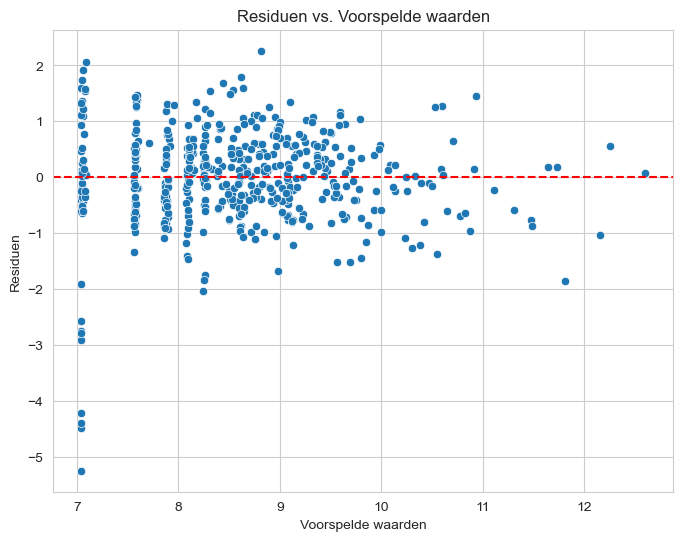

Interpretatie: Controleer op willekeurige spreiding rond 0-lijn zonder duidelijke patronen (homoscedasticiteit).


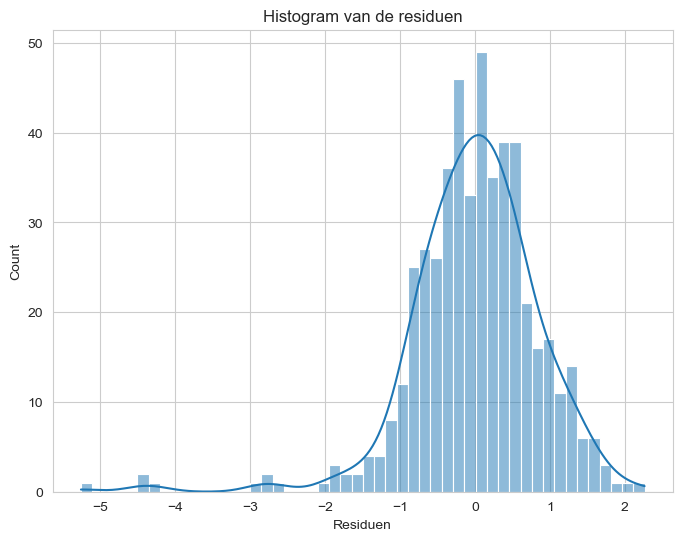

Interpretatie: Controleer of de residuen een klokvormige verdeling benaderen.


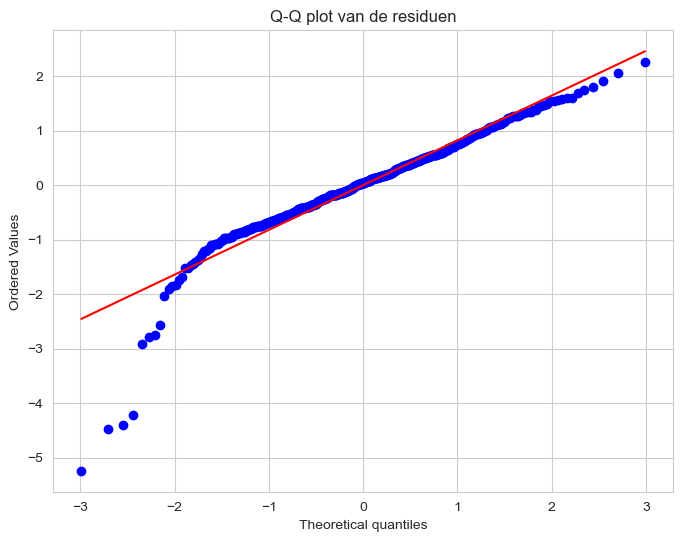

Interpretatie: Punten zouden op de diagonaal moeten liggen als de residuen normaal verdeeld zijn.


In [31]:
# Get residuals and fitted values
residuals = reduced_model.resid
fitted = reduced_model.fittedvalues

# Residual plot (residuals vs. fitted values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Voorspelde waarden')
plt.ylabel('Residuen')
plt.title('Residuen vs. Voorspelde waarden')
plt.show()

print("Interpretatie: Controleer op willekeurige spreiding rond 0-lijn zonder duidelijke patronen (homoscedasticiteit).")

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuen')
plt.title('Histogram van de residuen')
plt.show()

print("Interpretatie: Controleer of de residuen een klokvormige verdeling benaderen.")

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot van de residuen')
plt.show()

print("Interpretatie: Punten zouden op de diagonaal moeten liggen als de residuen normaal verdeeld zijn.")

De diagnostische plots suggereren dat de assumpties van homoscedasticiteit en normaliteit van de residuen redelijk goed worden benaderd, hoewel lichte afwijkingen zichtbaar zijn in de spreiding en staarten van de verdeling.

Gezien de robuustheid van regressiemodellen bij grotere steekproeven (n ≈ 500), worden deze resultaten als acceptabel beschouwd, maar wordt aangeraden de beperkingen te vermelden in de discussie.


Om de assumpties van de regressieanalyses te toetsen, werden de residuen nader onderzocht. De visualisatie van de residuen ten opzichte van de voorspelde waarden liet een grotendeels willekeurige spreiding rond de nul-lijn zien, zonder duidelijke patronen of systematische afwijkingen. Dit wijst op een acceptabele homoscedasticiteit, hoewel er aan de zijde met lage voorspelde waarden een iets bredere spreiding werd waargenomen.

Het histogram van de residuen benaderde een klokvormige verdeling, maar vertoonde een lichte negatieve scheefheid. Ook de Q-Q plot toonde aan dat de meeste residuen de theoretische normaalverdelingslijn volgden, met enkele afwijkingen in de uiterste kwantielen.

Deze resultaten suggereren dat de assumpties van normaliteit en homoscedasticiteit redelijk goed werden benaderd. Rekening houdend met de robuustheid van regressieanalyses bij grotere steekproeven (Field, 2013; Tabachnick & Fidell, 2019), worden de modellen als voldoende betrouwbaar beschouwd. Desalniettemin wordt aanbevolen om de lichte afwijkingen in de discussie als beperking te vermelden.